# 🧪 ANOVA Project: Effect of Drug Concentration on Enzyme Activity


# 🧪 ANOVA Project: Effect of Drug Concentration on Enzyme Activity

This project simulates a lab experiment to explore whether different concentrations of a hypothetical drug (**Drug X**) have a significant effect on the activity of a liver enzyme (ALT - Alanine Transaminase) in blood plasma.

We'll walk through this project step-by-step, with explanations suitable for those who are new to ANOVA and statistics.

### 🧠 What is ANOVA?

**ANOVA** stands for **Analysis of Variance**. It is a statistical test used when you want to compare **three or more group means** to determine if at least one of them is significantly different from the others.

In this project, we will:
- Simulate experimental data
- Visualize the data
- Perform One-Way ANOVA
- Conduct a post-hoc test (Tukey HSD)
- Interpret and report the results



This project simulates a lab experiment to assess whether different concentrations of **Drug X** significantly affect **ALT enzyme activity** in blood plasma. We'll perform:

- Data simulation
- Visualization
- One-Way ANOVA
- Post-hoc Tukey HSD test
- Result interpretation


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## 🔬 Simulate ALT Activity Data

In [7]:
np.random.seed(42)

# Simulated ALT activity (U/L)
control = np.random.normal(loc=42, scale=2, size=10)
low_dose = np.random.normal(loc=38, scale=2.5, size=10)
high_dose = np.random.normal(loc=30, scale=3, size=10)

# Combine into a DataFrame
df = pd.DataFrame({
    'ALT_Activity': np.concatenate([control, low_dose, high_dose]),
    'Group': ['Control'] * 10 + ['Low Dose'] * 10 + ['High Dose'] * 10
})

df.head()

,ALT_Activity,Group
0,42.993428,Control
1,41.723471,Control
2,43.295377,Control
3,45.046060,Control
4,41.531693,Control


## 📊 Visualize Group Differences

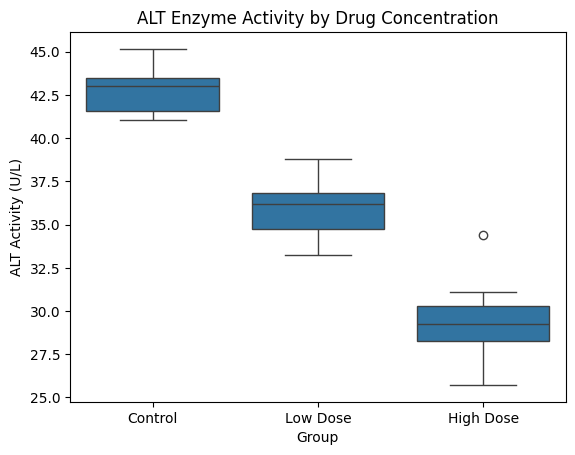

In [8]:
sns.boxplot(x='Group', y='ALT_Activity', data=df)
plt.title("ALT Enzyme Activity by Drug Concentration")
plt.ylabel("ALT Activity (U/L)")
plt.show()


## 📈 One-Way ANOVA - What Does It Do?

**One-Way ANOVA** is used when we have:
- One independent variable (e.g., drug concentration with 3 levels)
- One dependent variable (e.g., enzyme activity)

The ANOVA test calculates an **F-statistic** and a **p-value**:
- The **F-statistic** is the ratio of variance between groups to variance within groups.
- The **p-value** tells us if the observed differences between group means are statistically significant.

If **p < 0.05**, it means there's a significant difference in enzyme activity among the drug groups.


## 📈 One-Way ANOVA

In [9]:
# Split groups
control_data = df[df['Group'] == 'Control']['ALT_Activity']
low_data = df[df['Group'] == 'Low Dose']['ALT_Activity']
high_data = df[df['Group'] == 'High Dose']['ALT_Activity']

# Perform ANOVA
f_stat, p_val = f_oneway(control_data, low_data, high_data)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 118.7302
P-value: 0.0000



## 🔍 Post-hoc Analysis - Why Do It?

When ANOVA shows a significant result, it only tells us that **at least one** group mean is different. But **which one**?

To answer that, we use **Tukey's HSD (Honestly Significant Difference)** test. It compares **every pair of groups** and shows:
- Which groups differ
- The size of the difference
- Whether the difference is statistically significant

This is very useful in biological or clinical research where you want to know how treatments compare.


## 🔍 Post-hoc Tukey HSD Test

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
  Control High Dose -13.5617   0.0 -15.7438 -11.3795   True
  Control  Low Dose  -6.8728   0.0  -9.0549  -4.6906   True
High Dose  Low Dose   6.6889   0.0   4.5068    8.871   True
-----------------------------------------------------------


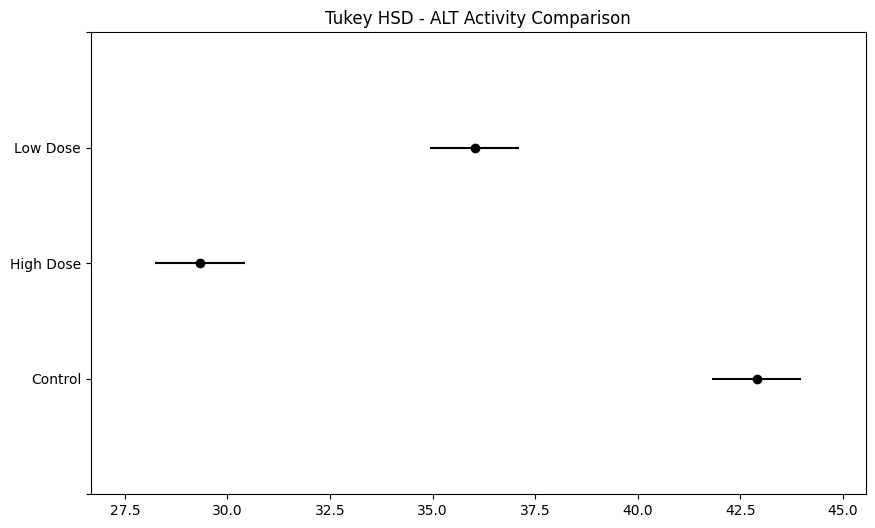

In [10]:
# Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df['ALT_Activity'],
                          groups=df['Group'],
                          alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.title("Tukey HSD - ALT Activity Comparison")
plt.show()

## ✅ Conclusion


The one-way ANOVA test revealed whether Drug X affects ALT enzyme activity significantly.

If the **p-value < 0.05**, we reject the null hypothesis and conclude that there is a statistically significant difference between at least two groups. Tukey’s test helps us identify which groups differ.

This is a practical application of ANOVA in a biomedical context simulating real lab work.



## ✅ Final Thoughts and Interpretation

In biomedical studies, ANOVA helps determine whether different treatments, doses, or conditions lead to meaningful biological changes.

**From this project, you learned:**
- How to simulate realistic biological data
- How to visualize group comparisons
- How to perform and interpret a one-way ANOVA
- How to use Tukey HSD to find specific group differences

This foundation prepares you for deeper statistical learning such as:
- Two-way ANOVA
- Repeated measures ANOVA
- Linear regression models
